# Price Prediction using Regression

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

#### Importing Dataset and creating a copy of that dataset

In [2]:
data = pd.read_csv("data.csv")
df = data.copy()

## Data Wrangling

#### Looking at our data 

In [3]:
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


####  'unnamed: 0' column seems to be not important as it is same as an index column, no use for us

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### Checking the number of records in dataset

In [5]:
print(f'The DataFrame consists of {df.shape[0]} rows and {df.shape[1]} columns')

The DataFrame consists of 215909 rows and 9 columns


#### Data types of all columns

In [6]:
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

Date columns appear as object so we may need to change that for some feature engineering

### Summary Statistics

#### Summary statistics of all columns, including object dataypes

In [7]:
df.describe(include='all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


This does not look good so we check separately for int and object types

In [8]:
df.describe(include=[np.number])

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


In [9]:
df.describe(include=['O'])

,insert_date,origin,destination,start_date,end_date,train_type,train_class,fare
count,215909,215909,215909,215909,215909,215909,215266,215266
unique,30543,5,5,2231,2870,16,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,Turista,Promo
freq,90,110440,105469,2089,1278,126577,164016,132065


**insert_date:**
Well, it doesn't really tell much. But the date when most people paid for ticket price is '2019-05-09 15:02:02', A total of 90 people did that.

**origin:**
There are total of 5 origin train stations. And most people (105469 number of people) boarded from Madrid.

**destination:**
Same as above. Most people (a total of 105469 people) landed on Madrid stations.

**start_date and end_date:**
Most tickets are starting and expiring at '2019-06-02'. Although this frequency seems not to matter much.

**train_type:**
There are 16 types of train. The type 'AVE' is the most boarded train: out of 215909, 126577 people boarded from this type. Perhaps, price wise, 'AVE' type is the most affordable option for people. We'll see later.

**price:**
'price' is the only numerical variable we have here. By looking at its mean (56.723877) & median (53.400000), we can see that the price data tends to be symmetrical. Although, the min price is 16.600000 and max price is 206.800000. This shows that price range is quite big which shows that this data might need scaling afterwards.

**train_class:**
There are a total of 5 train classes. 'Turista' is the most used train class. Perhaps because Turista is an affordable option for people price wise. We'll see about that later. 

**fare:**
There are 5 types of fare, out of which, promo is the most opted for option. Might be because its the most affordable. We'll see.

### **Missing Data**

In [10]:
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

#### Fill the Null values in the 'price' column with mean of the price

In [11]:
df['price'].fillna(value= df['price'].mean(), inplace= True)

In [12]:
df.isnull().sum()

insert_date      0
origin           0
destination      0
start_date       0
end_date         0
train_type       0
price            0
train_class    643
fare           643
dtype: int64

#### Dropping the rows containing Null values in the attributes train_class and fare as only few values are missing and removing them will not affect our model

In [13]:
df.dropna(subset=['train_class', 'fare'], inplace=True)

**Checking null values again in dataset**

In [14]:
df.isnull().sum()

insert_date    0
origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

# Exploratory Data Analysis (EDA)

#### Number of people boarding from different stations


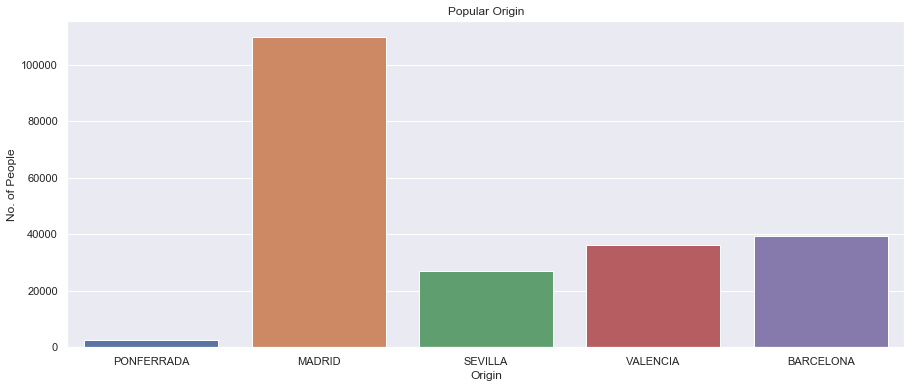

In [15]:
fig=plt.figure(figsize=(15,6))
ax=sns.countplot(x= 'origin', data= df)
plt.xlabel('Origin', {'fontsize': 12})
plt.ylabel('No. of People', {'fontsize': 12})
plt.title('Popular Origin', {'fontsize': 12})
plt.show()

Most number of people are boarding from Madrid, while Ponferrada has minimum number of people travelling to other cities

#### Number of people for the destination stations

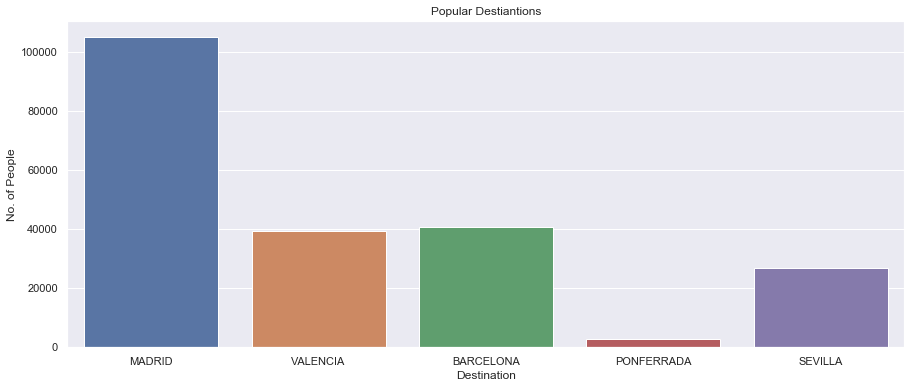

In [16]:
fig= plt.figure(figsize=(15,6))
sns.countplot(x='destination', data= df)
plt.xlabel('Destination', {'fontsize': 12})
plt.ylabel('No. of People', {'fontsize': 12})
plt.title('Popular Destiantions', {'fontsize': 12})
plt.show()

A very large number (approximately geater than 105000) have travelled to Madrid, while only a small number of people have travelled to Ponferrada.

#### **Different types of train that runs in Spain and their usage**

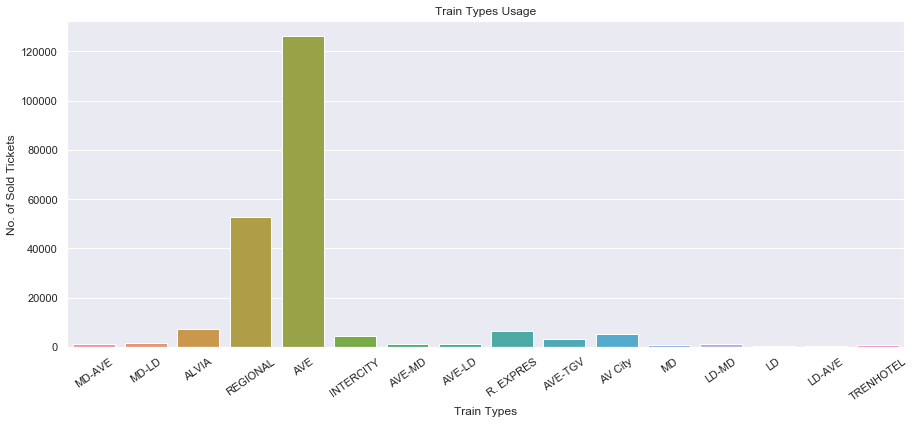

In [17]:
plt.figure(figsize=(15, 6))
sns.countplot(x=df['train_type'])
plt.xlabel('Train Types', {'fontsize': 12})
plt.xticks(rotation= 35)
plt.ylabel('No. of Sold Tickets', {'fontsize': 12})
plt.title('Train Types Usage', {'fontsize': 12})
plt.show()

**AVE** type train runs the maximum in number as compared to other train types


#### **Number of trains of different class and their usage**


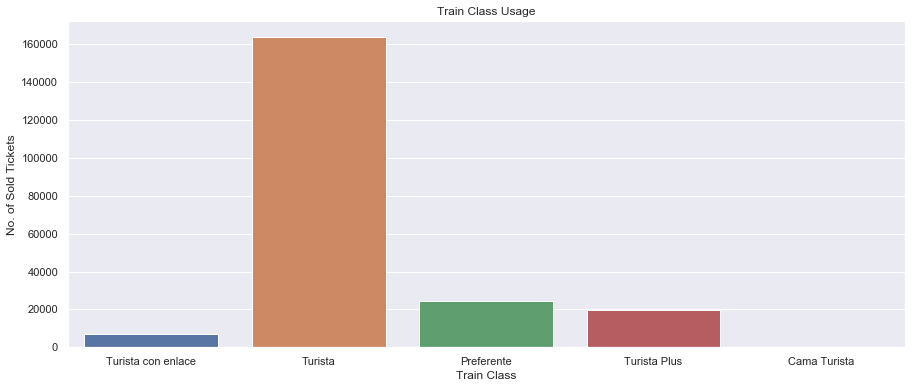

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x='train_class', data= df)
plt.xlabel('Train Class', {'fontsize': 12})
plt.ylabel('No. of Sold Tickets', {'fontsize': 12})
plt.title('Train Class Usage', {'fontsize': 12})
plt.show()

**Turista** train class is mostly used for travelling by the people.


#### **Number of tickets bought from each category**

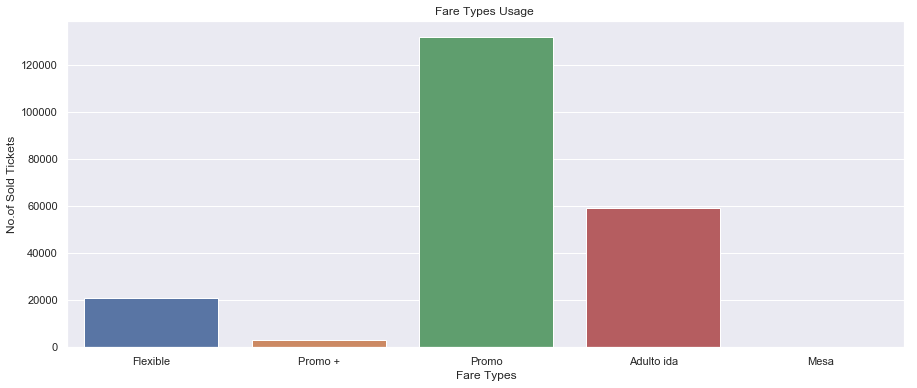

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x='fare', data= df)
plt.xlabel('Fare Types', {'fontsize': 12})
plt.ylabel('No.of Sold Tickets', {'fontsize': 12})
plt.title('Fare Types Usage ', {'fontsize': 12})
plt.show()

**Promo** fare tickets are the most bought tickets for travelling around spain.

#### **Distribution of the ticket prices**

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


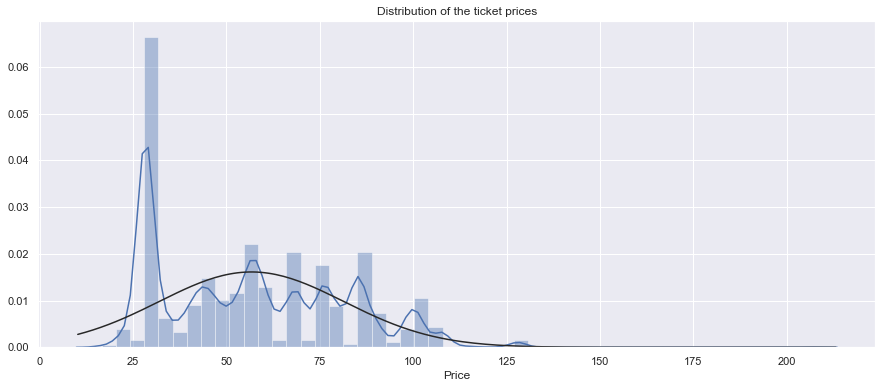

In [20]:
from scipy.stats import norm
plt.subplots(figsize=(15,6))
sns.distplot(df['price'], fit=norm)
plt.xlabel('Price', {'fontsize': 12})
plt.title('Distribution of the ticket prices', {'fontsize': 12})
plt.show()

The distribution of ticket prices is multimodal and right skewed. The mode value lies in between 27-29 as the bar for this particular bin is highest.

###### **train_class vs price**

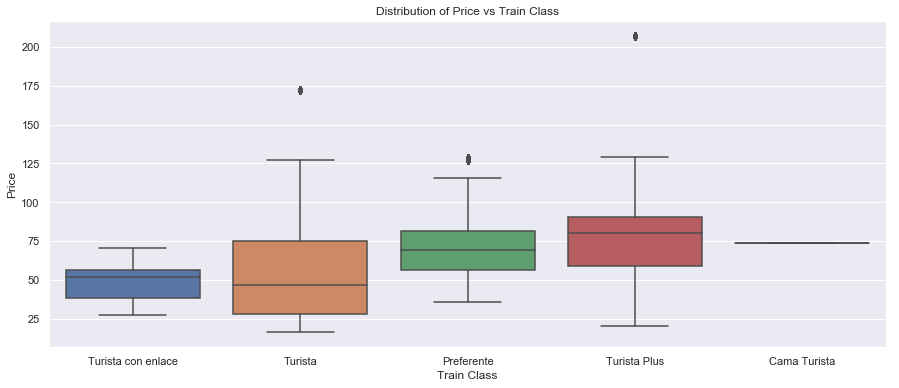

In [21]:
plt.subplots(figsize=(15,6))
sns.boxplot(x='train_class',y='price',data=df)
plt.xlabel('Train Class', {'fontsize': 12})
plt.ylabel('Price', {'fontsize': 12})
plt.title('Distribution of Price vs Train Class', {'fontsize': 12})
plt.show()

The ticket price for **Turista Plus** train class is comparatilvely high, but **Cama Turista** is bought by fewer people, as it may refer to a less visited destination e.g. Ponferrada.**Turista** class is the most sought for train class as it offer ticket prices that range from minimum possible upto approximately the the highest possible with exception of few outliers.**Turista con enlace** offers the prices between 25 and 75 euros and is 2nd least used train class.

#### **train_type vs price**


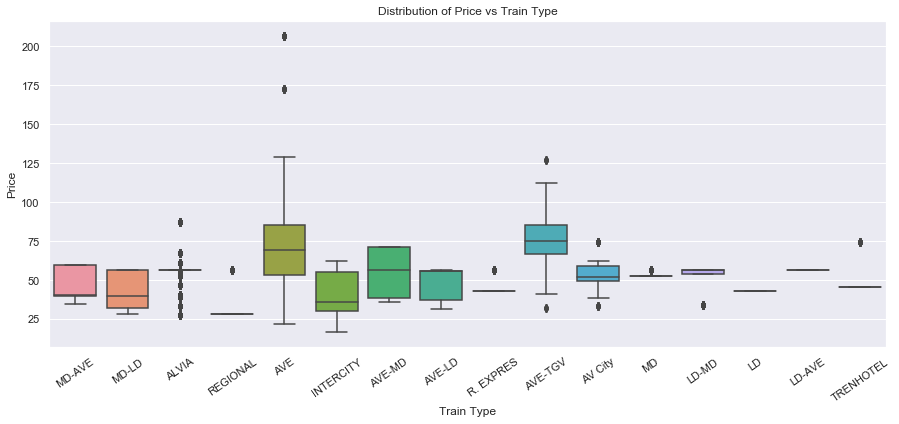

In [22]:
plt.subplots(figsize=(15,6))
ax = sns.boxplot(x='train_type',y='price',data=df)
plt.xlabel('Train Type', {'fontsize': 12})
plt.xticks(rotation=35)
plt.ylabel('Price', {'fontsize': 12})
plt.title('Distribution of Price vs Train Type', {'fontsize': 12})
plt.show()

From the above plot we can infer that **AVE** and **Ave-TGV** cost more as compared to other trains.

#### fare vs price

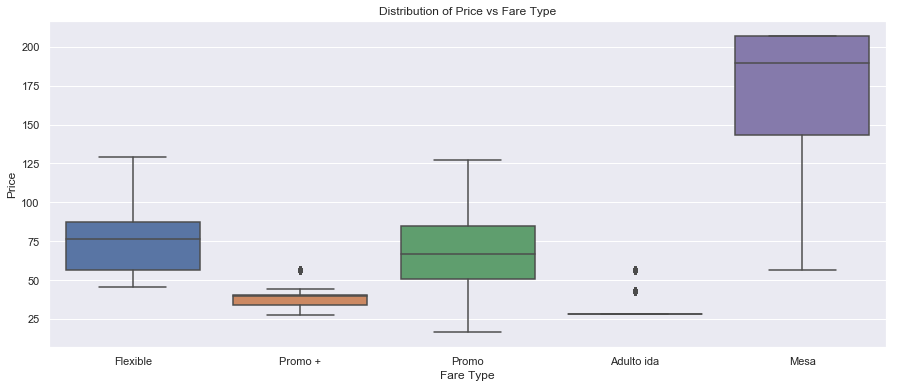

In [23]:
plt.figure(figsize=[15,6])
sns.boxplot(x="fare", y="price", data=df);
plt.xlabel('Fare Type', {'fontsize': 12})
plt.ylabel('Price', {'fontsize': 12})
plt.title('Distribution of Price vs Fare Type', {'fontsize': 12})
plt.show()

From the above plot it is clear that when it comes to fare **Mesa** is the most expensive one and ths might be the reason it is not widely used.**Adulto ida** has fixed price and is used quite often so we can say that it may be a Senior Citizen fare, While **Promo+** is least expensive. **Promo** is most used fare and offers a wide range of ticket prices including the minimum cost for a fare type.

## Feature Engineering


**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [24]:
import datetime

In [25]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)

In [26]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 

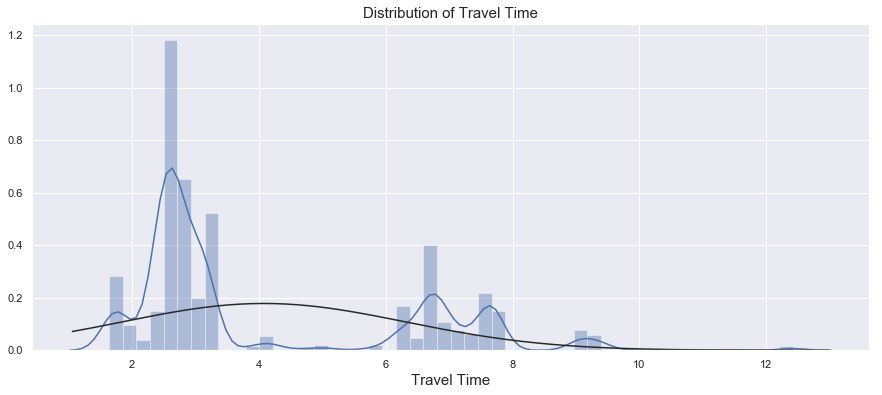

In [27]:
from scipy.stats import norm
plt.subplots(figsize=(15,6))
sns.distplot(df['travel_time_in_hrs'], fit=norm)
plt.xlabel('Travel Time', {'fontsize': 15})
plt.title('Distribution of Travel Time', {'fontsize': 15})
plt.show()

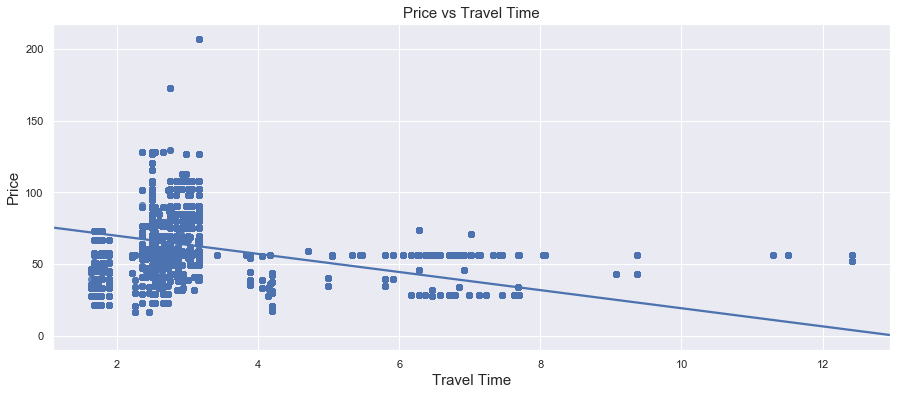

In [28]:
plt.figure(figsize=[15,6])
sns.regplot(x="travel_time_in_hrs", y="price", data=df);
plt.xlabel('Travel Time', {'fontsize': 15})
plt.ylabel('Price', {'fontsize': 15})
plt.title('Price vs Travel Time', {'fontsize': 15})
plt.show()

So, we can say that Higher the travel time lower the prices

At different time of a day depending on the traffic and avialability of tickets prices may vary so, we want to get the starting hour from the start_date also some late arrivas can be helpfull in determining the cost of ticket so, we will also create a new feature ending_hour from end_date.

#### Changing type of Date columns

In [29]:
for i in ['start_date','end_date']:
    df[i] = pd.to_datetime(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215266 entries, 0 to 215908
Data columns (total 10 columns):
insert_date           215266 non-null object
origin                215266 non-null object
destination           215266 non-null object
start_date            215266 non-null datetime64[ns]
end_date              215266 non-null datetime64[ns]
train_type            215266 non-null object
price                 215266 non-null float64
train_class           215266 non-null object
fare                  215266 non-null object
travel_time_in_hrs    215266 non-null float64
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 28.1+ MB


#### Extracting Starting hour and ending hour

In [30]:
df['starting_hour'] = df['start_date'].dt.hour
df['ending_hour'] = df['end_date'].dt.hour
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time_in_hrs,starting_hour,ending_hour
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible,4.700000,15,19
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +,5.800000,17,23
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +,5.916667,17,23
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +,4.983333,17,22
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo,4.133333,18,23


Now we want to see the relation between newly created features with price

#### starting_hour vs Price

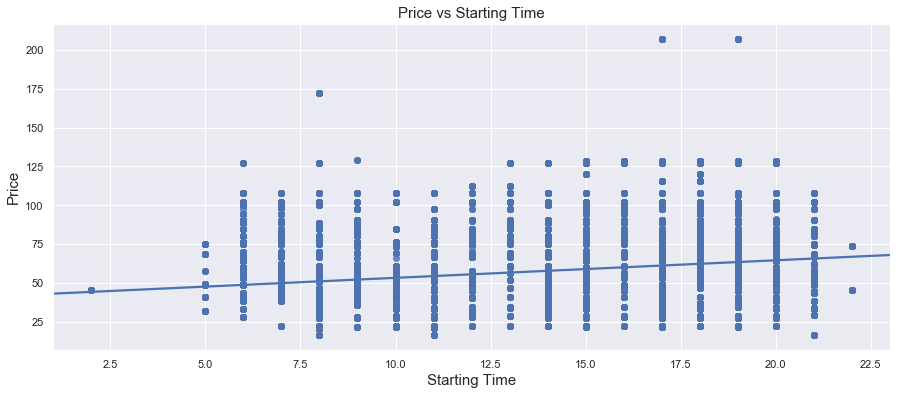

In [31]:
plt.figure(figsize=(15,6))
sns.regplot(x="starting_hour", y="price", data=df);
plt.xlabel('Starting Time', {'fontsize': 15})
plt.ylabel('Price', {'fontsize': 15})
plt.title('Price vs Starting Time', {'fontsize': 15})
plt.show()

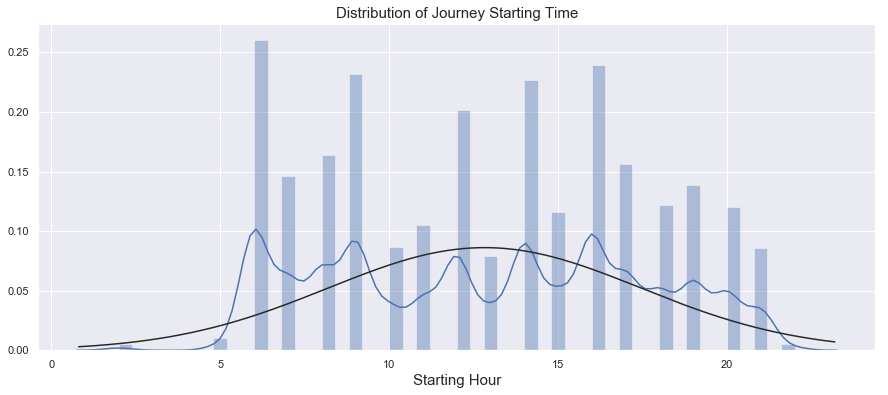

In [32]:
from scipy.stats import norm
plt.subplots(figsize=(15,6))
sns.distplot(df['starting_hour'], fit=norm)
plt.xlabel('Starting Hour', {'fontsize': 15})
plt.title('Distribution of Journey Starting Time', {'fontsize': 15})
plt.show()

#### ending_hour vs Price

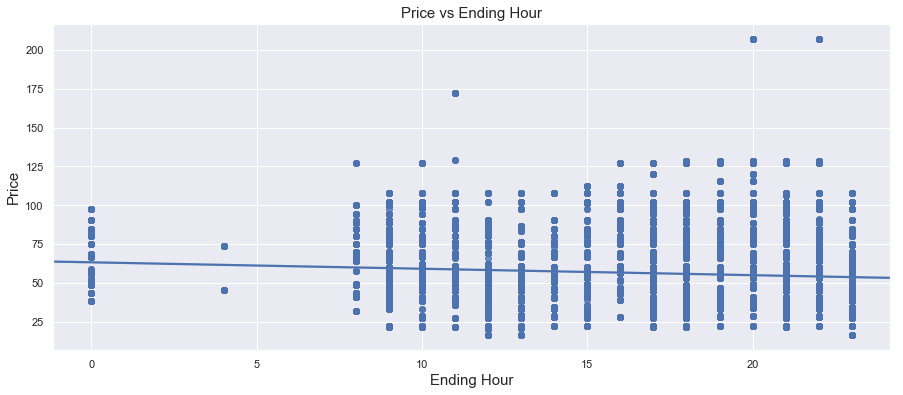

In [33]:
plt.figure(figsize=(15,6))
sns.regplot(x="ending_hour", y="price", data=df);
plt.xlabel('Ending Hour', {'fontsize': 15})
plt.ylabel('Price', {'fontsize': 15})
plt.title('Price vs Ending Hour', {'fontsize': 15})
plt.show()

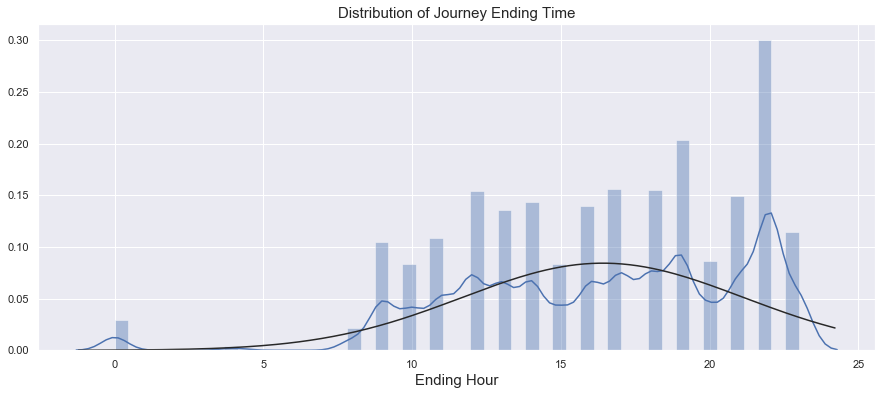

In [34]:
from scipy.stats import norm
plt.subplots(figsize=(15,6))
sns.distplot(df['ending_hour'], fit=norm)
plt.xlabel('Ending Hour', {'fontsize': 15})
plt.title('Distribution of Journey Ending Time', {'fontsize': 15})
plt.show()

### Observations
First we created two new features from start date and end date.
Then we tried to find the correlation between these features, for staring time correlation is positive but for travel time and ending correlation seems negative for whole data.

#### Removing redundant features


So now we get rid of those features which may not help us in our prediction model

In [35]:
df.drop(['start_date','end_date', 'insert_date'],axis=1,inplace=True)
df.head()

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs,starting_hour,ending_hour
0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000,15,19
1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000,17,23
2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667,17,23
3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333,17,22
4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333,18,23


We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## **Travelling from MADRID to SEVILLA**

#### People travelling from MADRID to SEVILLA

In [36]:
df1 = df[(df['origin']=='MADRID') & (df['destination']=='SEVILLA')]
df1.head()

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs,starting_hour,ending_hour
364,MADRID,SEVILLA,AV City,49.150000,Turista,Promo,2.916667,7,9
365,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo,2.733333,8,11
366,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo,2.633333,9,11
367,MADRID,SEVILLA,AVE,76.300000,Turista,Flexible,2.533333,11,13
368,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo,2.600000,11,13


#### Finding out travelling hours for each train type

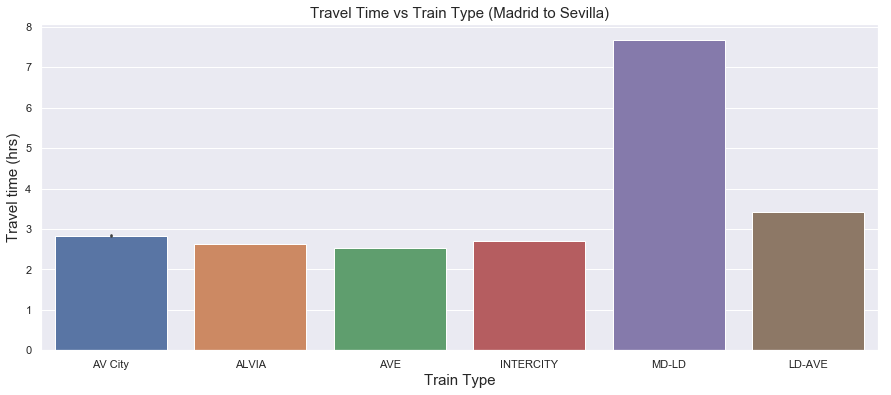

In [37]:
plt.figure(figsize=(15, 6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Travel time (hrs)', fontsize=15)
plt.title('Travel Time vs Train Type (Madrid to Sevilla)', fontsize=15)

plt.show()

#### train_type vs price

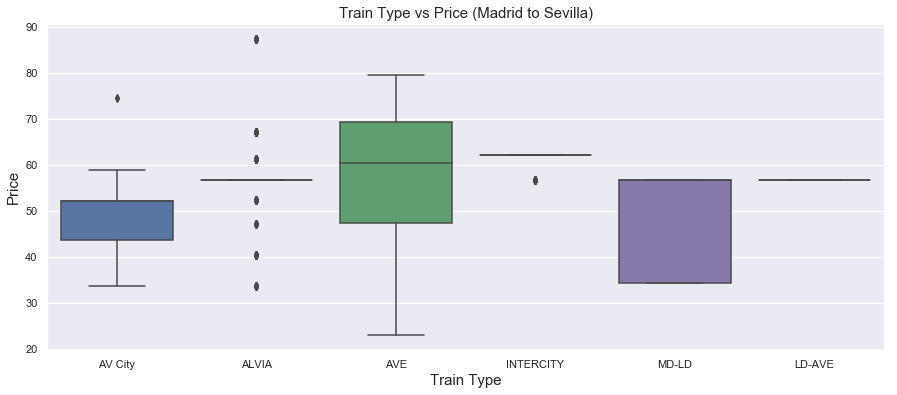

In [38]:
plt.figure(figsize=[15,6])
sns.boxplot(x='train_type', y= 'price', data =df1)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Train Type vs Price (Madrid to Sevilla)', fontsize=15)
plt.show()

#### Fare Type vs Price

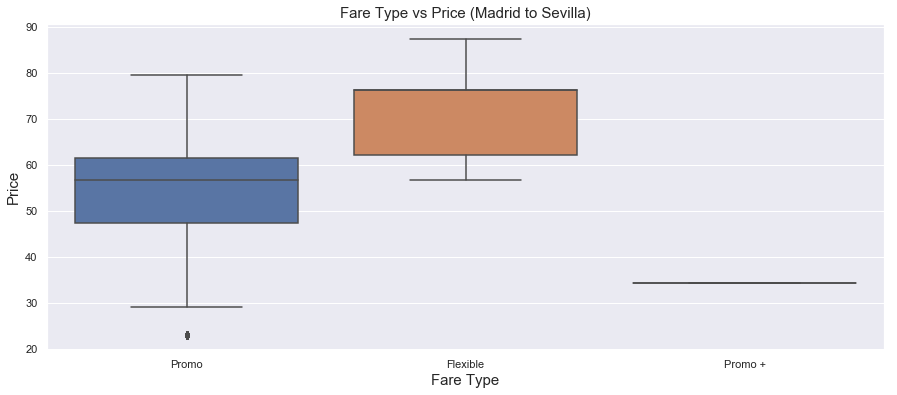

In [39]:
plt.figure(figsize=[15,6])
sns.boxplot(x="fare", y="price", data=df1);
plt.xlabel('Fare Type', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Fare Type vs Price (Madrid to Sevilla)', fontsize=15)
plt.show()

From the above graph, we can see that fastest train trvelling from Madrid to Sevilla is Type **AVE**, it is also the expensive one. It takes 2 and half hours to reach its destination. Whereas the slowest train is **MD-LD**, taking more than 7 and half hrs and is cheap as well. Only 3 types of fares are used, with **Flexible** fare type being the expensive. 

## **Travelling from MADRID to BARCELONA**


#### People travelling from MADRID to BARCELONA

In [40]:
df1 = df[(df['origin']=='MADRID') & (df['destination']=='BARCELONA')]
df1.head()

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs,starting_hour,ending_hour
79,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667,7,16
80,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667,7,16
81,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667,7,16
82,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667,7,16
83,MADRID,BARCELONA,AVE,66.75,Turista,Promo,3.150000,6,9


#### Finding out travelling hours for each train type

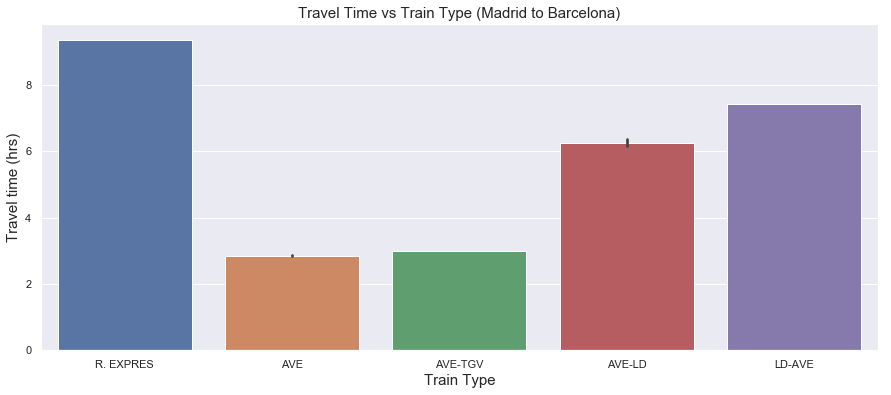

In [41]:
plt.figure(figsize=(15,6))
sns.barplot(x='train_type', y= 'travel_time_in_hrs', data= df1)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Travel time (hrs)', fontsize=15)
plt.title('Travel Time vs Train Type (Madrid to Barcelona)', fontsize=15)
plt.show()

#### train_type vs price

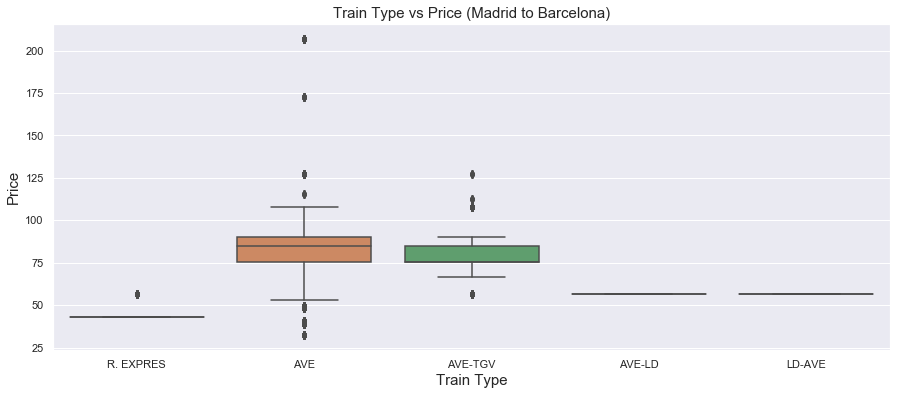

In [42]:
plt.figure(figsize=(15,6))
sns.boxplot(x='train_type', y='price', data= df1)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Train Type vs Price (Madrid to Barcelona)', fontsize=15)
plt.show()

#### Fare Type vs Price

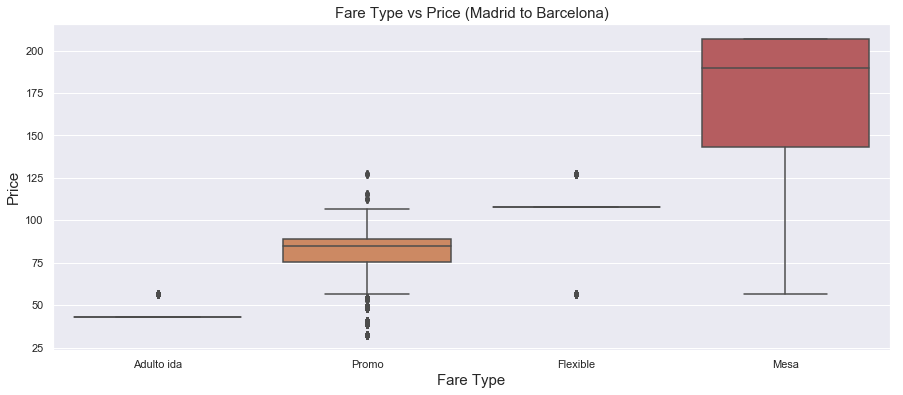

In [43]:
plt.figure(figsize=(15,6))
sns.boxplot(x="fare", y="price", data=df1);
plt.xlabel('Fare Type', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Fare Type vs Price (Madrid to Barcelona)', fontsize=15)
plt.show()

From the above graph, we can see that fastest train is **AVE** slightly better than **AVE-TGV**. Both train take about 2-3 hrs to reach final destination. **R.Express** takes max time(approx 9 hrs) and is cheap as well. **Mesa** fare type is most expensive.

## **Travelling from MADRID to VALENCIA**

#### People travelling from MADRID to VALENCIA

In [44]:
df1 = df[(df['origin']=='MADRID') & (df['destination']=='VALENCIA')]
df1.head()

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs,starting_hour,ending_hour
5,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.783333,6,12
6,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.716667,12,19
7,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.700000,16,22
8,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.583333,6,12
9,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.366667,12,19


#### Finding out travelling hours for each train type

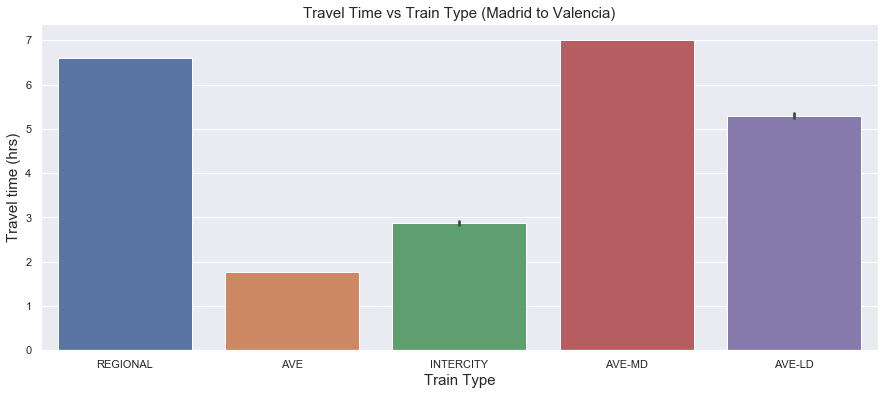

In [45]:
plt.figure(figsize=(15, 6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Travel time (hrs)', fontsize=15)
plt.title('Travel Time vs Train Type (Madrid to Valencia)', fontsize=15)
plt.show()

#### train_type vs price

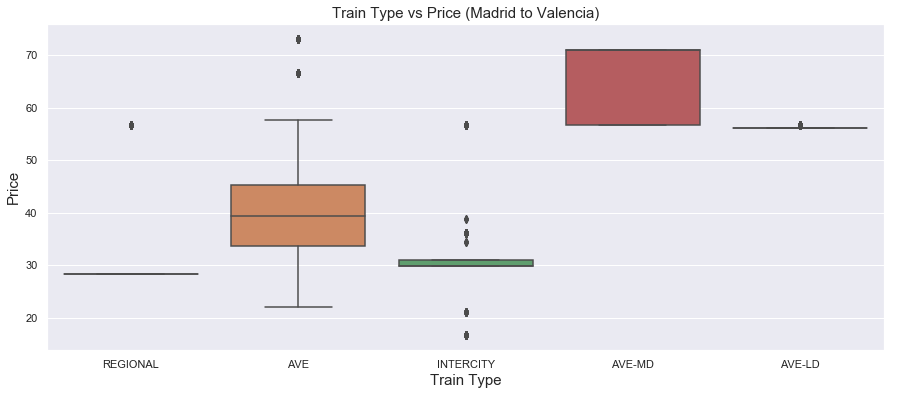

In [46]:
plt.figure(figsize=[15,6])
sns.boxplot(x="train_type", y="price", data=df1);
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Train Type vs Price (Madrid to Valencia)', fontsize=15)
plt.show()

#### fare_type vs price

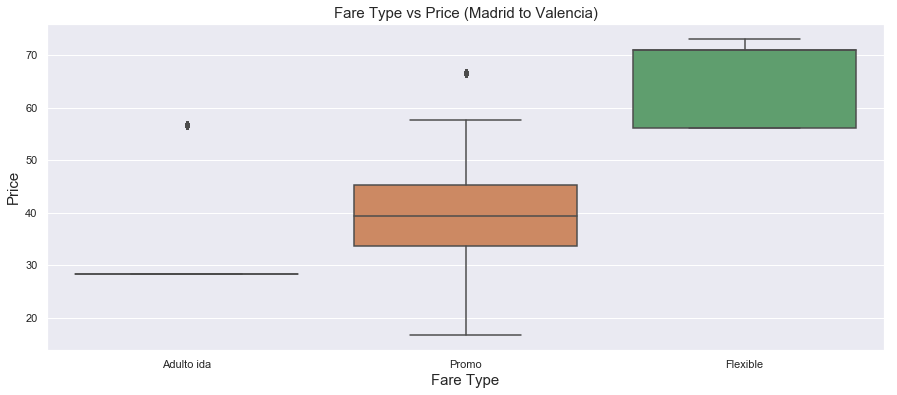

In [47]:
plt.figure(figsize=(15,6))
sns.boxplot(x="fare", y="price", data=df1);
plt.xlabel('Fare Type', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Fare Type vs Price (Madrid to Valencia)', fontsize=15)
plt.show()

From the above graph we can find that, **AVE** takes less time to reach its destination, but is not expensive as comapred to **AVE-MD** which is taking the max time 7 hrs to reach its destination. **Regional** train also takes close to 7 hrs time to reach destination but is cheap. When it comes to fare **Flexible** fare type is the most expensive

## **Travelling from MADRID to PONFERRADA**

#### People travelling from MADRID to PONFERRADA

In [48]:
df1 = df[(df['origin']=='MADRID') & (df['destination']=='PONFERRADA')]
df1.head()

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs,starting_hour,ending_hour
233,MADRID,PONFERRADA,AVE-MD,35.750000,Turista con enlace,Promo,3.883333,14,18
234,MADRID,PONFERRADA,AVE-LD,31.200000,Turista con enlace,Promo,4.200000,14,18
235,MADRID,PONFERRADA,ALVIA,33.500000,Turista,Promo,4.050000,17,21
236,MADRID,PONFERRADA,LD-MD,56.723877,Turista con enlace,Promo +,6.533333,12,18
237,MADRID,PONFERRADA,LD,42.750000,Turista con enlace,Promo +,4.200000,14,18


#### Finding out travelling hours for each train type

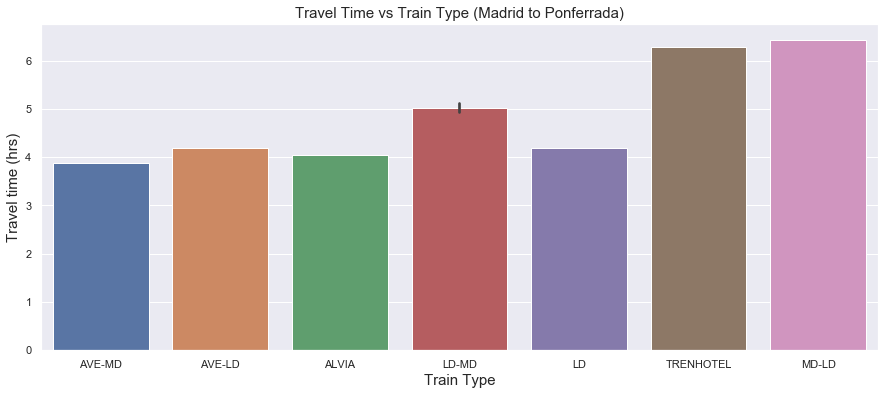

In [49]:
plt.figure(figsize=(15,6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data= df1)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Travel time (hrs)', fontsize=15)
plt.title('Travel Time vs Train Type (Madrid to Ponferrada)', fontsize=15)
plt.show()

#### train_type vs price

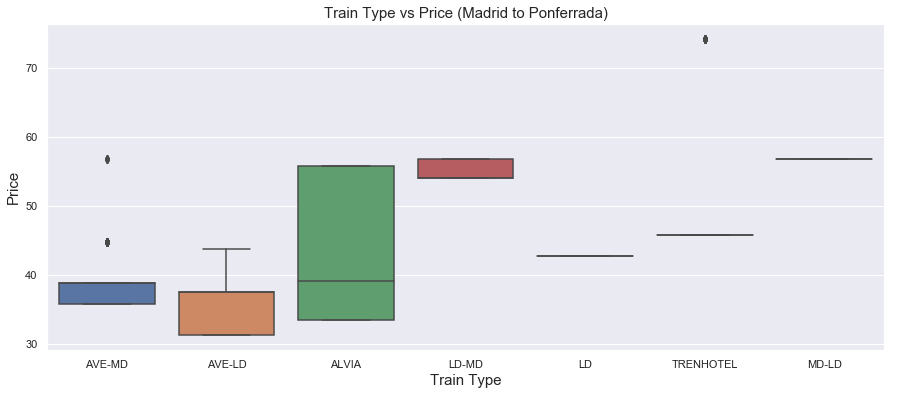

In [50]:
plt.figure(figsize=(15,6))
sns.boxplot(x='train_type', y='price', data= df1)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Train Type vs Price (Madrid to Ponferrada)', fontsize=15)
plt.show()

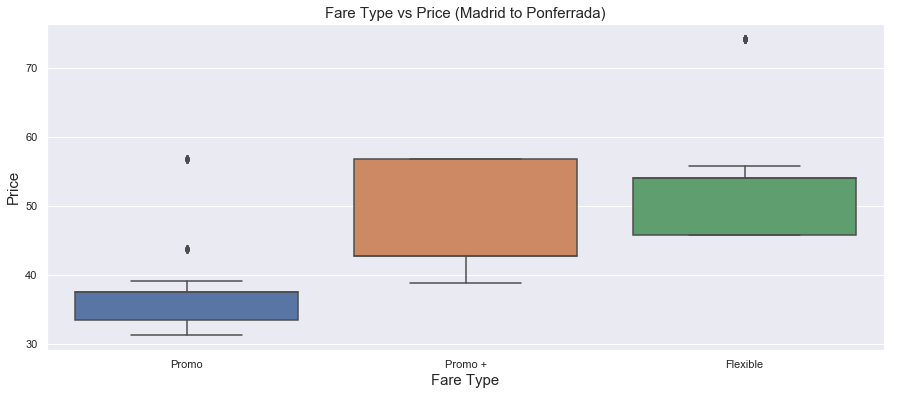

In [51]:
plt.figure(figsize=[15,6])
sns.boxplot(x="fare", y="price", data=df1);
plt.xlabel('Fare Type', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Fare Type vs Price (Madrid to Ponferrada)', fontsize=15)
plt.show()

4 out of 7 trains take almost 4 hrs to reach Ponferrada. but **AVE-MD** takes lesser as comapred to others. In terms of cost **AVE-MD** is expensive than **AVE-LD**, so,it might be feasible to travel on **AVE-LD** as it takes jsut over 4 hrs to reach destination. 
Most time taken by is **MD-LD** and is costly as well. **LD-MD** train type is also costly with upper quartile range similar to that of **MD-LD**. 

## Modeling

First we need to encode all the caategorical values we will use LabelEncoder package for this purpose

In [52]:
from sklearn.preprocessing import LabelEncoder

**Encoding only categorical variables**

In [53]:
lab_en = LabelEncoder()
df.iloc[:,0] = lab_en.fit_transform(df.iloc[:,0])
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,4] = lab_en.fit_transform(df.iloc[:,4])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])

In [54]:
df.head()

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs,starting_hour,ending_hour
0,2,1,11,59.50,4,1,4.700000,15,19
1,2,1,11,34.65,4,4,5.800000,17,23
2,2,1,12,39.95,4,4,5.916667,17,23
3,2,1,11,40.60,4,4,4.983333,17,22
4,2,1,0,27.90,2,3,4.133333,18,23


#### Separating the dependant and independant variables

In [55]:
X = df.drop(['price'], axis=1)
Y = df['price']

In [56]:
print(X.shape)
print(Y.shape)

(215266, 8)
(215266,)


#### Data Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled_minmax, columns = X.columns)
X.head()

F:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,origin,destination,train_type,train_class,fare,travel_time_in_hrs,starting_hour,ending_hour
0,0.5,0.25,0.733333,1.0,0.25,0.284389,0.65,0.826087
1,0.5,0.25,0.733333,1.0,1.00,0.386399,0.75,1.000000
2,0.5,0.25,0.800000,1.0,1.00,0.397218,0.75,1.000000
3,0.5,0.25,0.733333,1.0,1.00,0.310665,0.75,0.956522
4,0.5,0.25,0.000000,0.5,0.75,0.231839,0.80,1.000000


#### Splitting the data into test and train

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.30, random_state=25, shuffle=True)

# Applying Linear  Regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()

In [62]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Finding out the predictions using test data set.

In [63]:
lr_predict = lr.predict(X_test)

Predictions using training data set.

In [64]:
lr_predict_train = lr.predict(X_train)

Now we will use R-Squared and Mean Square Error metric for our model efficiency 

In [65]:
from sklearn.metrics import r2_score

R2 Score for test data

In [66]:
lr_r2_test= r2_score(Y_test, lr_predict)
print(lr_r2_test)

0.735442005710597


R2 Score for training data

In [67]:
lr_r2_train = r2_score(Y_train, lr_predict_train )
print(lr_r2_train)

0.7301095999174174


Comaparing training and testing R2 scores

In [68]:
print('R2 score for Linear Regression Training Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

R2 score for Linear Regression Training Data is:  0.7301095999174174
R2 score for Linear Regression Testing Data is:  0.735442005710597


In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
lr_mse_train=mean_squared_error(Y_train, lr_predict_train)
print('MSE for Linear Regression Training Data is: ', lr_mse_train)

lr_mse_test=mean_squared_error(Y_test, lr_predict)
print('MSE for Linear Regression Testing Data is: ', lr_mse_test)

MSE for Linear Regression Training Data is:  165.54630242034187
MSE for Linear Regression Testing Data is:  161.6429058723463


Claculating Adjusted R2 square to see if no. features are affecting the model efficiency

In [71]:
def adjR2 (xtest,ytest,r2):
    n = len(ytest)
    k = xtest.shape[-1]
    adj_r2 = 1 - ((1 - r2)*(n - 1)) / (n - k -1)
    return adj_r2


print(f'The adjusted R2 for Training Data is: {adjR2(X_train,Y_train,lr_r2_train)}')
print(f'The adjusted R2 for Testing Data is: {adjR2(X_test,Y_test,lr_r2_test)}')

The adjusted R2 for Training Data is: 0.7300952704364704
The adjusted R2 for Testing Data is: 0.7354092283964109


**Adjusted R2 score for training and testing data is same as R2 Score, so we do not need to remove any features**

Using Cross Validation for training our data

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
scores = cross_val_score(lr, X_train, Y_train, cv=10)

In [74]:
print(scores)

[0.72422711 0.72418479 0.73112383 0.7346546  0.72669275 0.74023814
 0.73253657 0.73203412 0.72299533 0.73181189]


In [75]:
print(scores.mean())

0.730049912976439


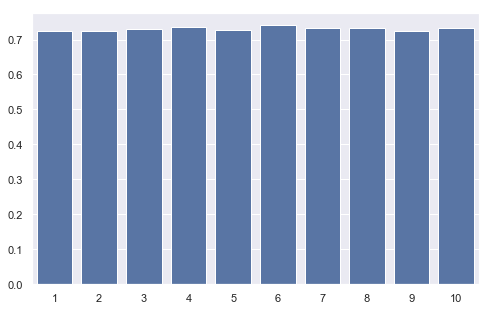

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(range(1,len(scores)+1)),y=scores, color='b')
plt.show()

Lets check if our data has some pattern in by plotting Residual Plot

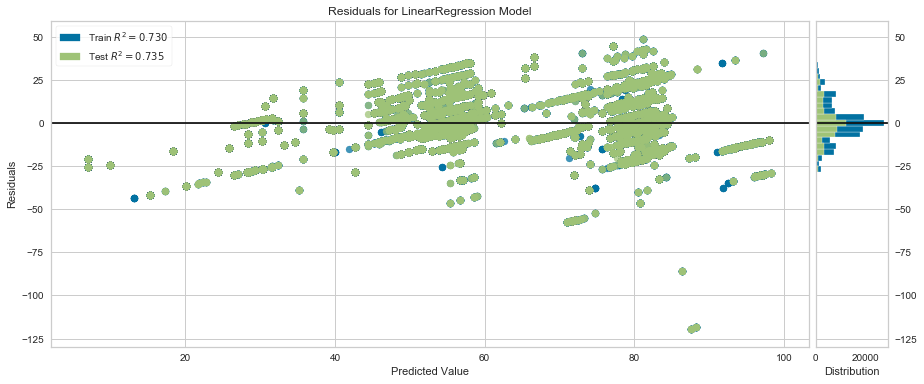

In [77]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(lr)
visualizer.fit(X_train.values, Y_train.values)  
visualizer.score(X_test.values, Y_test.values)  
visualizer.poof()   

# Applying Polynomial Regression

In [78]:
from sklearn.preprocessing import PolynomialFeatures 

Using only default features

In [79]:
poly_reg = PolynomialFeatures()

In [80]:
X_train_poly, X_test_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)

In [81]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
y_train_predicted,y_test_predicted = poly_model.predict(X_train_poly), poly_model.predict(X_test_poly)

R2 score for training data set i.e. evaluating the model on training dataset


In [83]:
r2_train = r2_score(Y_train, y_train_predicted)

R2 score for test data set i.e. evaluating the model on test dataset


In [84]:
r2_test = r2_score(Y_test, y_test_predicted)

Comaparing training and testing R2 scores

In [85]:
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.8304442764997486
The r2 score for testing set is:  0.8310514111147778


## Model Complexity

Now we find out the complexity using R2 score and will use *for* loop for finding the best degree and model complexity for polynomial regression model

In [86]:
from sklearn.metrics import mean_squared_error
mse_train=[]
mse_test=[]
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)
    poly = LinearRegression()
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted,y_tst_predict = poly.predict(X_tr_poly),poly.predict(X_tst_poly)
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    mse_train.append(mean_squared_error(Y_train, y_tr_predicted))
    mse_test.append(mean_squared_error(Y_test, y_tst_predict))
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

R2 Train [0.7301095999174174, 0.8304442764997486, 0.8682817335342127, 0.8992758623054141, 0.905062683687526]
R2 Test [0.7354420057105979, 0.8310514111147778, 0.8660126206174915, -22987367096371.67, -7046112998489.493]


In [87]:
print ('Mean Square Error Train', mse_train)
print ('Mean Square Error Test', mse_test)

Mean Square Error Train [165.5463024203419, 104.00267320024608, 80.79380358825748, 61.78251821744648, 58.232977802957976]
Mean Square Error Test [161.64290587234575, 103.22629230612368, 81.86526138354799, 1.4045105028076918e+16, 4305121012276045.0]


#### Plotting Model Complexity

(0, 1)

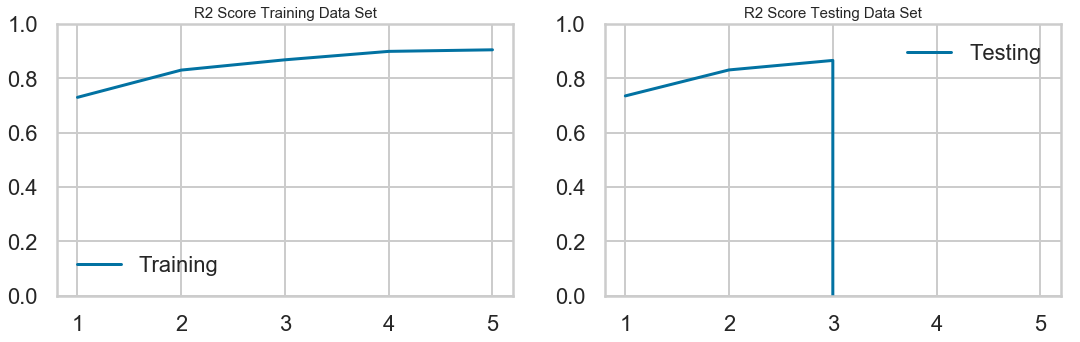

In [88]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.title('R2 Score Training Data Set',fontsize=15 )

plt.ylim(0,1)
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing')
plt.title('R2 Score Testing Data Set' ,fontsize=15)

plt.ylim(0,1)

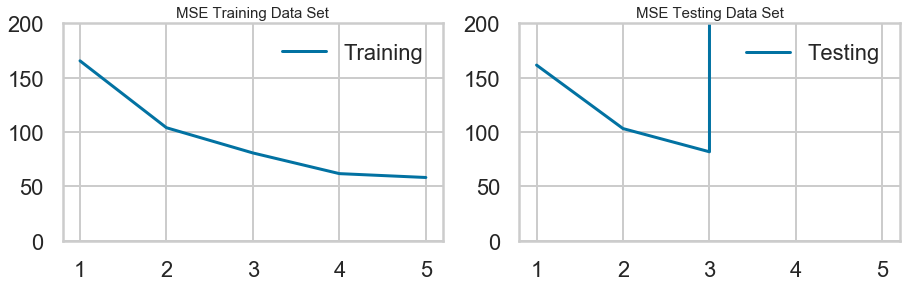

In [89]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=mse_train, label='Training')
plt.title('MSE Training Data Set',fontsize=15 )

plt.ylim(0,200)
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=mse_test, label='Testing')
plt.title('MSE Testing Data Set',fontsize=15 )

plt.ylim(0,200)
plt.show();

Ploynomial degree 3 model gives the best result as the r2_score for both test and train is higher as compared to other degrees. After degree 3 r2_score for testing starts decreasing, and r2_score for training keeps on increasing. Plus Mean Square Error shows that at degree 3 the training and testing data have minimum error, but starts rising for testing data after this point.

### Revising our model with Degree = 3

In [90]:
poly_reg_rev = PolynomialFeatures(degree=3)

In [91]:
X_train_poly  = poly_reg_rev.fit_transform(X_train)

In [92]:
X_test_poly=poly_reg_rev.fit_transform(X_test)

In [93]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
y_train_predicted = poly_model.predict(X_train_poly)


In [95]:
y_test_predicted=poly_model.predict(X_test_poly)

In [96]:
poly_r2_train = r2_score(Y_train, y_train_predicted)

In [97]:
poly_r2_test = r2_score(Y_test, y_test_predicted)

In [98]:
print ('The r2 score for training set is: ',poly_r2_train)
print ('The r2 score for testing set is: ',poly_r2_test)

The r2 score for training set is:  0.8682817335342127
The r2 score for testing set is:  0.8660126206174915


In [99]:
ploy_mse_train=mean_squared_error(Y_train, y_train_predicted)
print('MSE for Polynomial Regression Training Data is: ', ploy_mse_train)

poly_mse_test=mean_squared_error(Y_test, y_test_predicted)
print('MSE for Polynomial Regression Testing Data is: ', poly_mse_test)

MSE for Polynomial Regression Training Data is:  80.79380358825748
MSE for Polynomial Regression Testing Data is:  81.86526138354799


# Decision Tree Regressor

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
dt_reg=DecisionTreeRegressor(random_state=100)
dt_reg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [102]:
dt_reg.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [103]:
dt_reg_test_predict = dt_reg.predict(X_test)


In [104]:
dt_reg_train_predict = dt_reg.predict(X_train)

In [105]:
dt_r2_score_train =r2_score(Y_train, dt_reg_train_predict)
print('DT R2 Train', dt_r2_score_train)

dt_r2_score_test =r2_score(Y_test, dt_reg_test_predict)
print('DT R2 Test', dt_r2_score_test)

DT R2 Train 0.9124536457070925
DT R2 Test 0.9115706383256788


In [106]:
dt_mse_train=mean_squared_error(Y_train, dt_reg_train_predict)
print('DT MSE Train', dt_mse_train)

dt_mse_test=mean_squared_error(Y_test, dt_reg_test_predict)
print('DT MSE Test', dt_mse_test)

DT MSE Train 53.69948408367773
DT MSE Test 54.02966190406493


Now let us see which features were given importance by Decision Tree regressor

In [107]:
features_tuple=list(zip(X.columns,dt_reg.feature_importances_))

In [108]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [109]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5, 1.0, 'Decision Classifier - Features Importance')

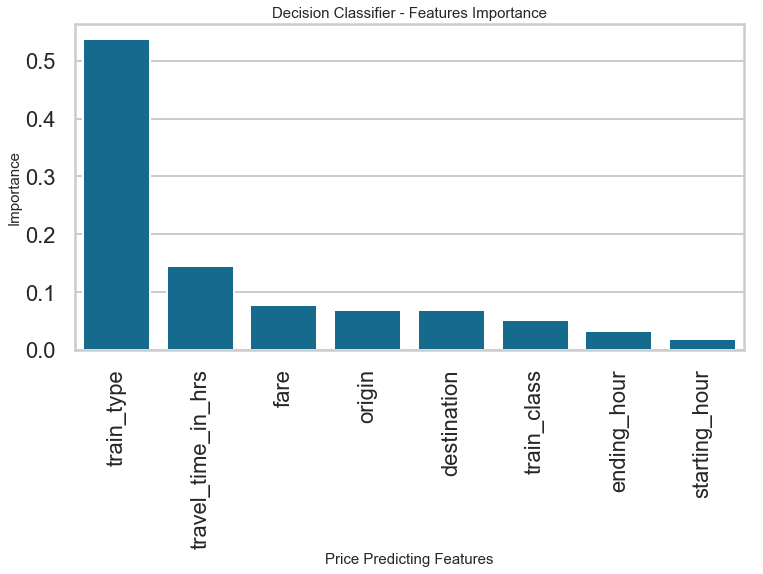

In [110]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Price Predicting Features",fontsize=15)
plt.ylabel("Importance",fontsize=15)
plt.xticks(rotation=90)
plt.title("Decision Classifier - Features Importance",fontsize=15)

## Hyperparameter Tuning Decision Tree using Randomized Search

In [111]:
from sklearn.model_selection import RandomizedSearchCV

In [112]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

In [113]:
random_grid1 = {"max_depth" : max_depth,
           "min_samples_split" :min_samples_split}

In [114]:
dt_random = RandomizedSearchCV(estimator = dt_reg, param_distributions = random_grid1, n_iter = 50, cv = 5, verbose=2, random_state=100)
# Fit the random search model
dt_random.fit(X_train, Y_train)

F:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] min_samples_split=2, max_depth=10 ...............................
[CV] ................ min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_split=2, max_depth=10 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................ min_samples_split=2, max_depth=10, total=   0.3s
[CV] min_samples_split=2, max_depth=10 ...............................
[CV] ................ min_samples_split=2, max_depth=10, total=   0.2s
[CV] min_samples_split=2, max_depth=10 ...............................
[CV] ................ min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_split=2, max_depth=10 ...............................
[CV] ................ min_samples_split=2, max_depth=10, total=   0.1s
[CV] min_samples_split=5, max_depth=10 ...............................
[CV] ................ min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_split=5, max_depth=10 ...............................
[CV] ................ min_samples_split=5, max_depth=10, total=   0.1s
[CV] min_samples_split=5, max_depth=10 ...............................
[CV] ................ min_samples_split=5, max_depth=10, total=   0.3s
[CV] min_samples_split=5, max_depth=10 ...............................
[CV] .

[CV] ............... min_samples_split=10, max_depth=40, total=   0.3s
[CV] min_samples_split=2, max_depth=50 ...............................
[CV] ................ min_samples_split=2, max_depth=50, total=   0.3s
[CV] min_samples_split=2, max_depth=50 ...............................
[CV] ................ min_samples_split=2, max_depth=50, total=   0.2s
[CV] min_samples_split=2, max_depth=50 ...............................
[CV] ................ min_samples_split=2, max_depth=50, total=   0.3s
[CV] min_samples_split=2, max_depth=50 ...............................
[CV] ................ min_samples_split=2, max_depth=50, total=   0.2s
[CV] min_samples_split=2, max_depth=50 ...............................
[CV] ................ min_samples_split=2, max_depth=50, total=   0.2s
[CV] min_samples_split=5, max_depth=50 ...............................
[CV] ................ min_samples_split=5, max_depth=50, total=   0.2s
[CV] min_samples_split=5, max_depth=50 ...............................
[CV] .

[CV] ............... min_samples_split=10, max_depth=80, total=   0.2s
[CV] min_samples_split=10, max_depth=80 ..............................
[CV] ............... min_samples_split=10, max_depth=80, total=   0.2s
[CV] min_samples_split=10, max_depth=80 ..............................
[CV] ............... min_samples_split=10, max_depth=80, total=   0.2s
[CV] min_samples_split=2, max_depth=90 ...............................
[CV] ................ min_samples_split=2, max_depth=90, total=   0.2s
[CV] min_samples_split=2, max_depth=90 ...............................
[CV] ................ min_samples_split=2, max_depth=90, total=   0.2s
[CV] min_samples_split=2, max_depth=90 ...............................
[CV] ................ min_samples_split=2, max_depth=90, total=   0.2s
[CV] min_samples_split=2, max_depth=90 ...............................
[CV] ................ min_samples_split=2, max_depth=90, total=   0.2s
[CV] min_samples_split=2, max_depth=90 ...............................
[CV] .

[CV] ............. min_samples_split=10, max_depth=None, total=   0.2s
[CV] min_samples_split=10, max_depth=None ............................
[CV] ............. min_samples_split=10, max_depth=None, total=   0.2s
[CV] min_samples_split=10, max_depth=None ............................
[CV] ............. min_samples_split=10, max_depth=None, total=   0.3s
[CV] min_samples_split=10, max_depth=None ............................
[CV] ............. min_samples_split=10, max_depth=None, total=   0.2s
[CV] min_samples_split=10, max_depth=None ............................
[CV] ............. min_samples_split=10, max_depth=None, total=   0.2s


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   56.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best'),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=100, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [115]:
dt_reg_rand=dt_random.best_estimator_
dt_reg_rand

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [116]:
dt_reg_test_pred_rand=dt_reg_rand.predict(X_test)
dt_reg_train_pred_rand=dt_reg_rand.predict(X_train)

In [117]:
dt_rand_r2_score_train =r2_score(Y_train, dt_reg_train_pred_rand)
print('DT R2 Train', dt_rand_r2_score_train)

dt_rand_r2_score_test =r2_score(Y_test, dt_reg_test_pred_rand)
print('DT R2 Test', dt_rand_r2_score_test)

DT R2 Train 0.9124536457070925
DT R2 Test 0.9115706383256788


In [118]:
dt_rand_mse_train=mean_squared_error(Y_train, dt_reg_train_pred_rand)
print('DT MSE Train', dt_rand_mse_train)

dt_rand_mse_test=mean_squared_error(Y_test, dt_reg_test_pred_rand)
print('DT MSE Test', dt_rand_mse_test)

DT MSE Train 53.69948408367773
DT MSE Test 54.02966190406493


# Random Forest Regressor

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
rf_reg = RandomForestRegressor(random_state=100, n_estimators=10, max_depth=15)

In [121]:
rf_reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [122]:
rf_reg_test_predict = rf_reg.predict(X_test)
rf_reg_train_predict = rf_reg.predict(X_train)

In [123]:
rf_r2_score_train =r2_score(Y_train, rf_reg_train_predict)
print ('RF R2 Train', rf_r2_score_train)

rf_r2_score_test =r2_score(Y_test, rf_reg_test_predict)
print ('RF R2 Test', rf_r2_score_test)

RF R2 Train 0.9122548959304626
RF R2 Test 0.9113615052365909


In [124]:
rf_mse_train =mean_squared_error(Y_train, rf_reg_train_predict)
print ('RF MSE Train', rf_mse_train)

rf_mse_test =mean_squared_error(Y_test, rf_reg_test_predict)
print ('RF MSE Test', rf_mse_test)

RF MSE Train 53.82139390565691
RF MSE Test 54.15744061785891


# Ada Boost

In [125]:
from sklearn.ensemble import AdaBoostRegressor

Using tuned Decision Tree as base estimator

In [126]:
adb_reg = AdaBoostRegressor(random_state=100,n_estimators=100, base_estimator=dt_reg_rand)
adb_reg.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=100,
         random_state=100)

In [127]:
adb_reg_test_predict=adb_reg.predict(X_test)
adb_reg_train_predict=adb_reg.predict(X_train)

In [128]:
adb_r2_score_train =r2_score(Y_train, adb_reg_train_predict)
print ('ADB R2 Train', adb_r2_score_train)

adb_r2_score_test =r2_score(Y_test, adb_reg_test_predict)
print ('ADB R2 Test', adb_r2_score_test)

ADB R2 Train 0.870573205752031
ADB R2 Test 0.8697524423836395


In [129]:
adb_mse_train =mean_squared_error(Y_train, adb_reg_train_predict)
print ('ADB MSE Train', adb_mse_train)

adb_mse_test =mean_squared_error(Y_test, adb_reg_test_predict)
print ('ADB MSE Test', adb_mse_test)

ADB MSE Train 79.38825247327638
ADB MSE Test 79.58025896149485


# XGBoost

In [130]:
import xgboost as xgb

In [131]:
xgb_reg = xgb.XGBRFRegressor(seed=25,nthread=1,random_state=100, max_depth=25)

In [132]:
xgb_reg.fit(X_train, Y_train)

F:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:38:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
        colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
        max_depth=25, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=1, objective='reg:linear', random_state=100,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=25,
        silent=None, subsample=0.8, verbosity=1)

In [133]:
xgb_pred_test = xgb_reg.predict(X_test)
xgb_pred_train = xgb_reg.predict(X_train)

In [134]:
xgb_r2_score_train =r2_score(Y_train, xgb_pred_train)
print ('XGB R2 Train', xgb_r2_score_train)

xgb_r2_score_test =r2_score(Y_test, xgb_pred_test)
print ('XGB R2 Test', xgb_r2_score_test)

XGB R2 Train 0.9087098859677194
XGB R2 Test 0.9080558319557074


In [135]:
xgb_mse_train =mean_squared_error(Y_train, xgb_pred_train)
print ('XGB MSE Train', xgb_mse_train)

xgb_mse_test =mean_squared_error(Y_test, xgb_pred_test)
print ('XGB MSE Test', xgb_mse_test)

XGB MSE Train 55.9958443166231
XGB MSE Test 56.1771816444788


# Comparison

In [136]:
comparison_dict={"Algorithm":["Linear Regression",'Polynomial Degree 3','Decision Tree','Tuned DT',"Random Forest","Ada Boost","XGB Boost"],
                 "R2 Train":[lr_r2_train,poly_r2_train,dt_r2_score_train,dt_rand_r2_score_train,rf_r2_score_train,adb_r2_score_train,xgb_r2_score_train],
                 "R2 Test":[lr_r2_test,poly_r2_test,dt_r2_score_test,dt_rand_r2_score_test,rf_r2_score_test,adb_r2_score_test,xgb_r2_score_test],
                 "MSE Train":[lr_mse_train,ploy_mse_train,dt_mse_train,dt_rand_mse_train,rf_mse_train,adb_mse_train,xgb_mse_train],
                 "MSE Test":[lr_mse_test,poly_mse_test,dt_mse_test,dt_rand_mse_test,rf_mse_test,adb_mse_test,xgb_mse_test],
                }

In [137]:
comparison=pd.DataFrame(comparison_dict)
comparison.sort_values(['R2 Test','MSE Test'], ascending=False)

,Algorithm,R2 Train,R2 Test,MSE Train,MSE Test
2,Decision Tree,0.912454,0.911571,53.699484,54.029662
3,Tuned DT,0.912454,0.911571,53.699484,54.029662
4,Random Forest,0.912255,0.911362,53.821394,54.157441
6,XGB Boost,0.908710,0.908056,55.995844,56.177182
5,Ada Boost,0.870573,0.869752,79.388252,79.580259
1,Polynomial Degree 3,0.868282,0.866013,80.793804,81.865261
0,Linear Regression,0.730110,0.735442,165.546302,161.642906


# Conclusion

From the above table we can say that Decision Tree, Tuned Decision Tree, Random Forest works best for predicting ticket prices given the data, as R2 score for these models is high and MSE is low.